# Machine Learning Project: T7 - Intrusion Detection

## Objectives
- Load and preprocess the KDD dataset.
- Train 2 machine learning models for attack classification.
- Evaluate the models' performance using appropriate metrics.
- Analyze the results and determine the best model for letter recognition.

## Context

## Methodology
1. **Dataset Loading**: Use pandas to load the EMNIST dataset.
2. **Preprocessing**: Separate the labels from the images and reshape the images.
3. **Model Training**: Use various machine learning techniques to train the models.
4. **Evaluation**: Use performance metrics such as accuracy to evaluate the models.
5. **Results Analysis**: Compare the models and select the best one.

# Uploading libraries
Let's begin to prepare all the libraries and load the dataset from the current directory.

In [65]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
df = pd.read_csv("KDDTrainClean.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [67]:
df.info()
df.loc[df['label'] != "normal", "label"] = 'attack' 
df.head()
# 3. Split dei dati in train e test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


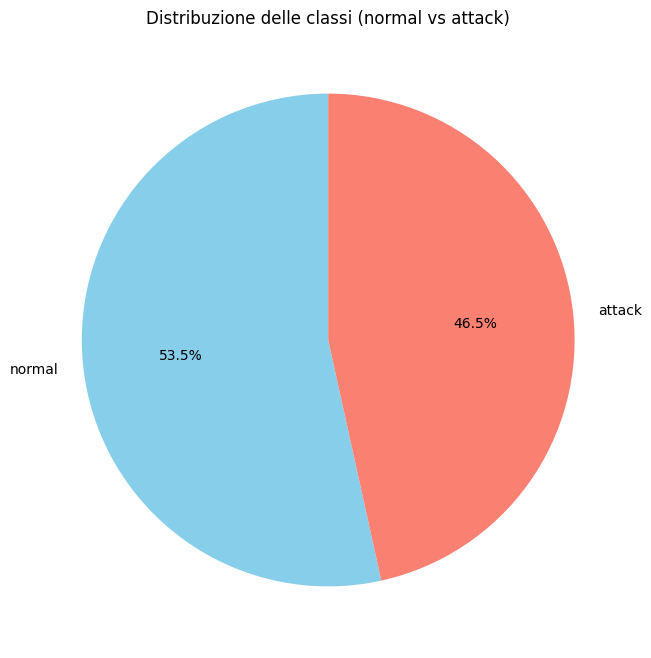

In [68]:
# Creare i dati per il grafico a torta
class_counts = df['label'].value_counts()
 
# Creare i dati per il grafico a torta
class_counts = df['label'].value_counts()
 
# Grafico a torta senza spazi
plt.figure(figsize=(8, 8))
class_counts.plot.pie(autopct='%1.1f%%', labels=class_counts.index, colors=['skyblue', 'salmon'], startangle=90)
plt.title("Distribuzione delle classi (normal vs attack)")
plt.ylabel("")  # Rimuove l'etichetta dell'asse y
plt.show()

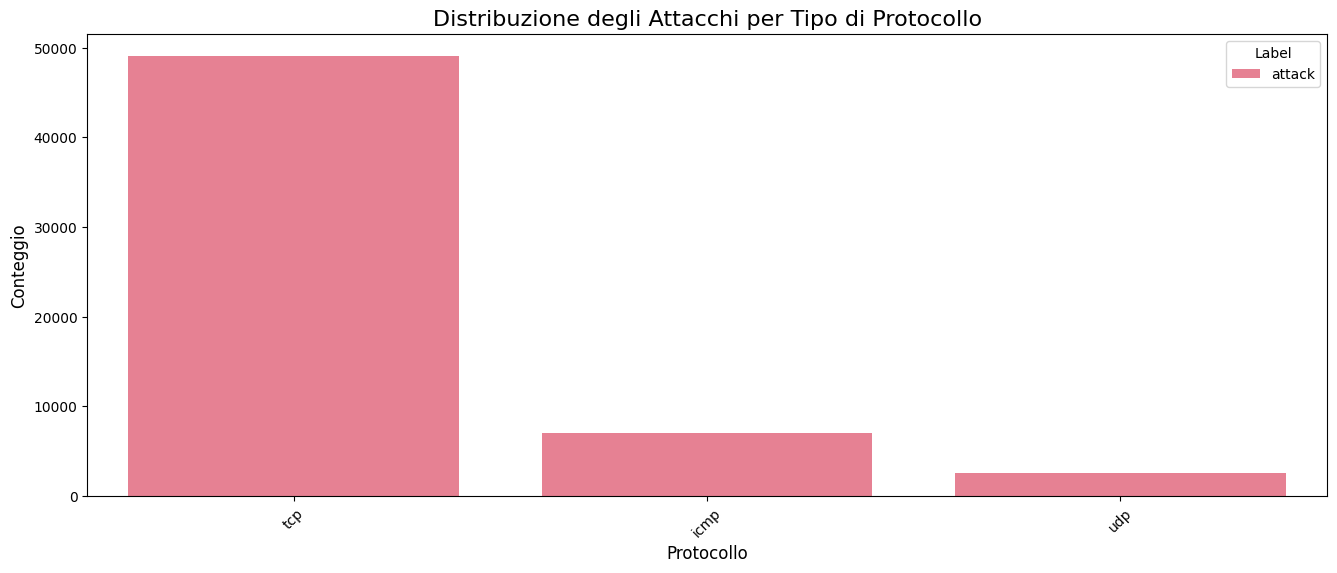

In [69]:
plt.figure(figsize=(16, 6))
sns.countplot(x='protocol_type', data=df[df['label'] == "attack"], hue='label', palette='husl')
plt.xticks(rotation=45)
plt.title('Distribuzione degli Attacchi per Tipo di Protocollo', fontdict={'fontsize': 16})
plt.xlabel('Protocollo', fontsize=12)
plt.ylabel('Conteggio', fontsize=12)
plt.legend(title='Label', loc='upper right')
plt.show()

In [70]:
le = LabelEncoder()
df['protocol_type']=le.fit_transform(df['protocol_type'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['label']=le.fit_transform(df['label'])

In [71]:
df.info()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int64  
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# Helping Function

In [72]:
def plot_confusion_matrix(y_true, y_pred, labels=None, cmap=plt.cm.viridis, values_format='d'):
    """
    Funzione per calcolare e visualizzare la matrice di confusione.
    
    Args:
    - y_true: array-like, etichette reali.
    - y_pred: array-like, etichette predette dal modello.
    - labels: list, etichette delle classi (default: None, sarà determinato automaticamente).
    - cmap: Colormap per la matrice di confusione (default: plt.cm.viridis).
    - values_format: Formato per i valori nella matrice (default: 'd' per interi).
    """
    # Calcola la matrice di confusione
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Visualizza la matrice di confusione
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=cmap, values_format=values_format)
    plt.show()



# Splitting the dataset

In [73]:

# 4. Split dei dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

abbiamo provato RobustScaler ma peggiorava l'accuracy

In [74]:
scaler = MinMaxScaler()
# Fit the scaler to the features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (no fit here to avoid data leakage)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

In [75]:
# 5. Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
 
# 6. Predizioni
y_pred = model.predict(X_test_scaled)
 
# 7. Valutazione del modello
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9530859297479659

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11773
           1       0.95      0.97      0.96     13422

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



dire che lo scaling ha aiutato da 88,6 a 95,53

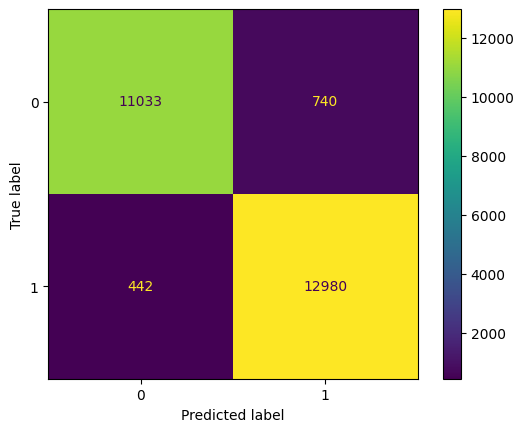

In [76]:

plot_confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)

# KNN

Accuracy: 0.993292319904743

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11773
           1       0.99      0.99      0.99     13422

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



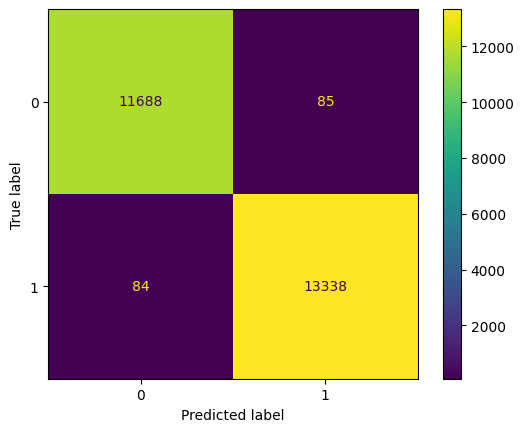

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)  # Usa 5 vicini come default

# 5. Addestra il modello
knn.fit(X_train_scaled, y_train)

# 6. Fai le predizioni
y_pred = knn.predict(X_test_scaled)

# 7. Valuta il modello
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)

# Decision Tree

In [78]:
  
# 7. Creazione e allenamento del Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
 
# 8. Valutazione sul test set
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
 
 

Accuracy: 0.9978964080174638

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11773
           1       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



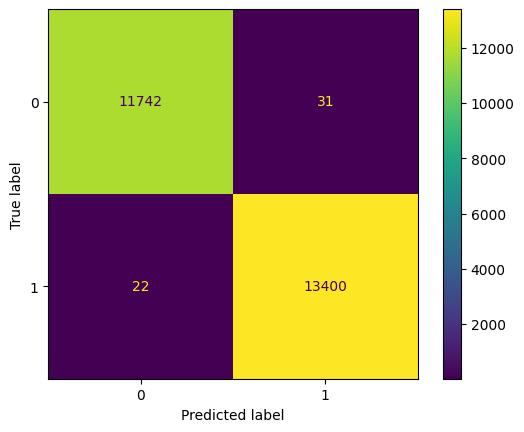

In [79]:

plot_confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)

Accuratezza: 0.9986505258979956
Report di classificazione:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11773
           1       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



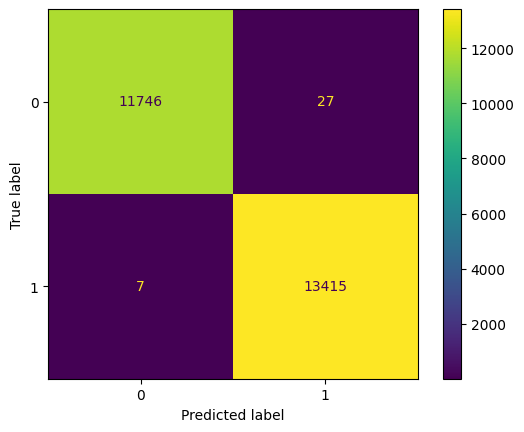

In [81]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello
rf_model.fit(X_train, y_train)
# Previsioni
y_pred = rf_model.predict(X_test)
# Accuratezza
print("Accuratezza:", accuracy_score(y_test, y_pred))

# Report dettagliato
print("Report di classificazione:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)


# Neural Network